In [2]:
from goatools.base import download_go_basic_obo
obo_fname = download_go_basic_obo()


$ get http://purl.obolibrary.org/obo/go/go-basic.obo
requests.get(http://purl.obolibrary.org/obo/go/go-basic.obo, stream=True)
  WROTE: go-basic.obo


In [3]:
from goatools.obo_parser import GODag

obodag = GODag("go-basic.obo")

go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms


In [4]:
from goatools.base import get_godag
godag = get_godag('go-basic.obo', optional_attrs='relationship')

  EXISTS: go-basic.obo
go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms; optional_attrs(relationship)


In [11]:
goid = 'GO:0006282'

In [12]:
def prt_flds(gosubdag):
    """Print the available printing fields"""
    print('Print fields:')
    for fld in sorted(gosubdag.prt_attr['flds']):
        print('    {F}'.format(F=fld))

In [13]:
from goatools.gosubdag.gosubdag import GoSubDag

# Create a subset of the GO DAG which contains:
#   * The selected GO term and
#   * All the GO terms above it
gosubdag = GoSubDag(goid, godag, relationships=True, prt=False)

# Get additional information for chosen GO
ntgo = gosubdag.go2nt[goid]

# Choose fields and custom printing format
# prt_flds(gosubdag)  # Uncomment to see the available print fields
prtfmt = '{NS} {GO} D{depth:02} {GO_name}'

# Print detailed information for GO
print(prtfmt.format(**ntgo._asdict()))

BP GO:0006282 D07 regulation of DNA repair


In [14]:
from goatools.gosubdag.plot.gosubdag_plot import GoSubDagPlot
GoSubDagPlot(gosubdag).plt_dag('GO.png')

    1 usr  28 GOs  WROTE: GO.png


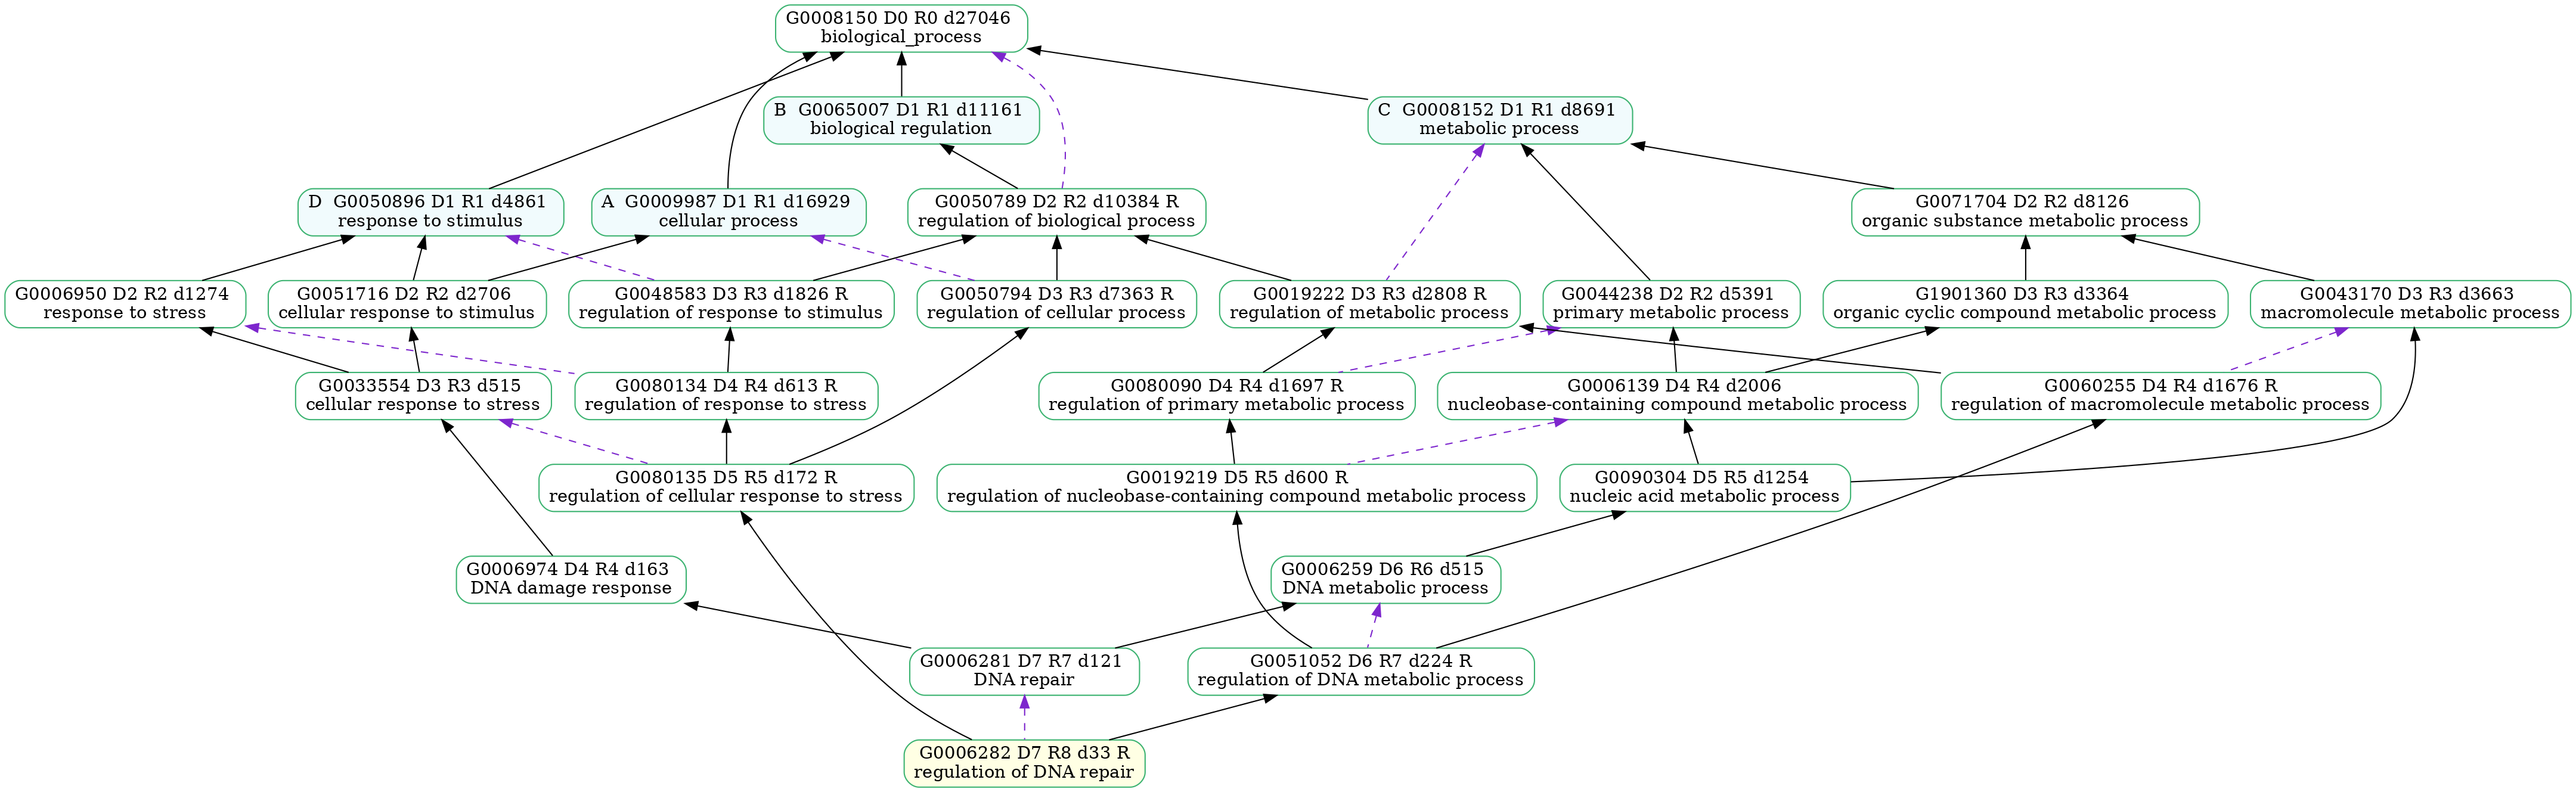

In [17]:
#plot image in notebook
from IPython.display import Image
#plot high resolution image
Image(filename='GO.png',width=800, height=400)


In [16]:
from goatools.godag.go_tasks import get_go2parents

go2parents = get_go2parents(gosubdag.go2obj, gosubdag.relationships)
for goid_parent in go2parents[goid]:
    print(prtfmt.format(**gosubdag.go2nt[goid_parent]._asdict()))

BP GO:0080135 D05 regulation of cellular response to stress
BP GO:0006281 D07 DNA repair
BP GO:0051052 D06 regulation of DNA metabolic process


In [28]:

goterm = godag[goid]

print('Parents up "is_a": required relationship')
for p_term in goterm.parents:
    print(prtfmt.format(**gosubdag.go2nt[p_term.item_id]._asdict()))
    
if 'part_of' in goterm.relationship:
    print('\nParents up "part_of" optional relationship:')
    for p_go in goterm.relationship['part_of']:
        print(prtfmt.format(**gosubdag.go2nt[p_go.item_id]._asdict()))
        
if 'regulates' in goterm.relationship:
    print('\nParents up "regulates" optional relationship:')
    for p_go in goterm.relationship['regulates']:
        print(prtfmt.format(**gosubdag.go2nt[p_go.item_id]._asdict()))

# godag must be loaded with: optional_attrs='relationship'
# gosubdag must be loaded with: relationships=True
print('\nAncestors up all loaded relationships:')
for p_go in gosubdag.rcntobj.go2ancestors[goid]:
    print(prtfmt.format(**gosubdag.go2nt[p_go]._asdict()))

Parents up "is_a": required relationship
BP GO:0080135 D05 regulation of cellular response to stress
BP GO:0051052 D06 regulation of DNA metabolic process

Parents up "regulates" optional relationship:
BP GO:0006281 D07 DNA repair

Ancestors up all loaded relationships:
BP GO:0051716 D02 cellular response to stimulus
BP GO:0080135 D05 regulation of cellular response to stress
BP GO:0050896 D01 response to stimulus
BP GO:0006259 D06 DNA metabolic process
BP GO:0050794 D03 regulation of cellular process
BP GO:0044238 D02 primary metabolic process
BP GO:0033554 D03 cellular response to stress
BP GO:0019219 D05 regulation of nucleobase-containing compound metabolic process
BP GO:0065007 D01 biological regulation
BP GO:0019222 D03 regulation of metabolic process
BP GO:0006281 D07 DNA repair
BP GO:0006974 D04 DNA damage response
BP GO:0009987 D01 cellular process
BP GO:0060255 D04 regulation of macromolecule metabolic process
BP GO:0090304 D05 nucleic acid metabolic process
BP GO:1901360 D03

In [25]:
from goatools.obo_parser import GODag
from goatools.associations import read_gaf
from goatools.go_enrichment import GOEnrichmentStudy

# Load the GO DAG
obodag = GODag("go-basic.obo")


go-basic.obo: fmt(1.2) rel(2024-04-24) 45,667 Terms

Load  Ontology Enrichment Analysis ...


RuntimeError: NO ITEMS FOUND IN ASSOCIATIONS {}

In [ ]:
gene_2_go = { 'gene1': ['GO:0008150', 'GO:0008152'],    

In [26]:
#read "GOsoperoni.pkl"
import pandas as pd
df=pd.read_pickle("GOsoperoni.pkl")

In [71]:
GOs=df.loc[0:50,"GO_process"].to_list()
GOs_background=df.loc[:,"GO_process"].to_list()
GOs_background=[item for sublist in GOs_background for item in sublist]
GOs=[item for sublist in GOs for item in sublist]
print(len(GOs))
print(len(GOs_background))
from collections import Counter
print(Counter(GOs))

34
2284
Counter({'GO:0006310': 3, 'GO:0006260': 3, 'GO:0006281': 2, 'GO:0006355': 2, 'GO:0009432': 1, 'GO:0006282': 1, 'GO:0032508': 1, 'GO:0071897': 1, 'GO:0006302': 1, 'GO:0015074': 1, 'GO:0019684': 1, 'GO:0022900': 1, 'GO:0006139': 1, 'GO:0006950': 1, 'GO:0006569': 1, 'GO:0051716': 1, 'GO:0006352': 1, 'GO:2000142': 1, 'GO:0006629': 1, 'GO:0000160': 1, 'GO:0016310': 1, 'GO:0008150': 1, 'GO:0015707': 1, 'GO:0042128': 1, 'GO:0015706': 1, 'GO:0001510': 1, 'GO:0006396': 1, 'GO:0055085': 1})


In [72]:
def extract_ancestors(goid):
    """Extract all ancestors for a given GO term."""
    gosubdag = GoSubDag(goid, godag, relationships=True, prt=False)
    go2ancestors = gosubdag.rcntobj.go2ancestors
    if goid not in go2ancestors:
        print("No ancestors found for {GO}".format(GO=goid))
        return []
    return go2ancestors[goid]

In [73]:
GOs = [item for sublist in (extract_ancestors(x) for x in GOs) for item in sublist]
GOs_background = [item for sublist in (extract_ancestors(x) for x in GOs_background) for item in sublist]

No ancestors found for GO:0008150
No ancestors found for GO:0008150
1 GO IDs NOT FOUND IN GO DAG: GO:0006165
No ancestors found for GO:0006165
No ancestors found for GO:0008150
1 GO IDs NOT FOUND IN GO DAG: GO:0044265
No ancestors found for GO:0044265
1 GO IDs NOT FOUND IN GO DAG: GO:0042779
No ancestors found for GO:0042779
1 GO IDs NOT FOUND IN GO DAG: GO:0034641
No ancestors found for GO:0034641
1 GO IDs NOT FOUND IN GO DAG: GO:0044265
No ancestors found for GO:0044265
1 GO IDs NOT FOUND IN GO DAG: GO:0006807
No ancestors found for GO:0006807
No ancestors found for GO:0008150
No ancestors found for GO:0008150
No ancestors found for GO:0008150
1 GO IDs NOT FOUND IN GO DAG: GO:0019932
No ancestors found for GO:0019932
1 GO IDs NOT FOUND IN GO DAG: GO:0035998
No ancestors found for GO:0035998
1 GO IDs NOT FOUND IN GO DAG: GO:0006807
No ancestors found for GO:0006807
1 GO IDs NOT FOUND IN GO DAG: GO:0035998
No ancestors found for GO:0035998
1 GO IDs NOT FOUND IN GO DAG: GO:0006807
No an

In [74]:

newGOs=[]
for x in GOs:
    GO=godag[x].id + " - "+godag[x].name+" L"+str(godag[x].level)+" D"+str(godag[x].depth)
    
    newGOs.append(GO)
newGOs_background=[]
for x in GOs_background:
    GO=godag[x].id + " - "+godag[x].name+" L"+str(godag[x].level)+" D"+str(godag[x].depth)
    newGOs_background.append(GO)
print(Counter(newGOs))


Counter({'GO:0008150 - biological_process L0 D0': 33, 'GO:0008152 - metabolic process L1 D1': 25, 'GO:0071704 - organic substance metabolic process L2 D2': 22, 'GO:0044238 - primary metabolic process L2 D2': 21, 'GO:0009987 - cellular process L1 D1': 21, 'GO:1901360 - organic cyclic compound metabolic process L3 D3': 20, 'GO:0090304 - nucleic acid metabolic process L4 D5': 18, 'GO:0043170 - macromolecule metabolic process L3 D3': 18, 'GO:0006139 - nucleobase-containing compound metabolic process L3 D4': 18, 'GO:0006259 - DNA metabolic process L5 D6': 12, 'GO:0044237 - cellular metabolic process L2 D2': 11, 'GO:0050896 - response to stimulus L1 D1': 8, 'GO:0051716 - cellular response to stimulus L2 D2': 6, 'GO:1901576 - organic substance biosynthetic process L3 D3': 6, 'GO:0009058 - biosynthetic process L2 D2': 6, 'GO:0009059 - macromolecule biosynthetic process L4 D4': 6, 'GO:0044249 - cellular biosynthetic process L3 D3': 6, 'GO:0016070 - RNA metabolic process L5 D6': 6, 'GO:0033554 -

In [75]:
print(Counter(newGOs_background))

Counter({'GO:0008150 - biological_process L0 D0': 2261, 'GO:0008152 - metabolic process L1 D1': 1630, 'GO:0009987 - cellular process L1 D1': 1588, 'GO:0071704 - organic substance metabolic process L2 D2': 1336, 'GO:0044238 - primary metabolic process L2 D2': 1110, 'GO:0044237 - cellular metabolic process L2 D2': 1032, 'GO:0009058 - biosynthetic process L2 D2': 794, 'GO:1901576 - organic substance biosynthetic process L3 D3': 780, 'GO:0043170 - macromolecule metabolic process L3 D3': 699, 'GO:1901360 - organic cyclic compound metabolic process L3 D3': 693, 'GO:1901564 - organonitrogen compound metabolic process L3 D3': 624, 'GO:0044249 - cellular biosynthetic process L3 D3': 599, 'GO:0006139 - nucleobase-containing compound metabolic process L3 D4': 557, 'GO:0090304 - nucleic acid metabolic process L4 D5': 417, 'GO:0044281 - small molecule metabolic process L2 D2': 408, 'GO:0009059 - macromolecule biosynthetic process L4 D4': 387, 'GO:1901566 - organonitrogen compound biosynthetic proce

In [78]:
from scipy.stats import hypergeom
GOs=Counter(newGOs)
GOs_background=Counter(newGOs_background)
#use hypergeometric test to calculate p-value
#M = total number of genes
#n = number of genes with the motif
#N = total number of genes with the GO term
#x = number of genes with the GO term
M = len(df)
n = 50
p_values = {}
enrichments = {}
for go in GOs:
    N = GOs_background[go]+GOs[go]
    x = GOs[go]
    enrichments[go] = (x/n)/(N/M)
    enrichments[go] = 'positive' if enrichments[go]>1 else 'negative'
    p_values[go] = hypergeom.sf(x-1, M, N, n)
dfGO = pd.DataFrame(list(p_values.items()), columns=['GO term', 'p-value'])
dfGO['enrichment'] = dfGO['GO term'].map(enrichments)
dfGO = dfGO.sort_values(by='p-value', ascending=True)
df


,locus_tag_inizio,operone,GO_process
0,LAU37_RS16010,WP_250121493.1,"[GO:0006310, GO:0009432, GO:0006281]"
1,LAU37_RS14470,WP_250121220.1,"[GO:0006355, GO:0006282]"
2,LAU37_RS14595,WP_250121243.1,[]
3,LAU37_RS21505,WP_250122517.1,[GO:0006260]
4,LAU37_RS30680,WP_250126418.1,[]
...,...,...,...
5105,LAU37_RS11500,WP_250125700.1,[]
5106,LAU37_RS02825,WP_250124129.1,[GO:0000160]
5107,LAU37_RS02020,WP_250123972.1,[]
5108,LAU37_RS15185,WP_250121353.1,[]


In [79]:
dfGO

,GO term,p-value,enrichment
2,GO:0090304 - nucleic acid metabolic process L4 D5,5.431175e-08,positive
0,GO:0006259 - DNA metabolic process L5 D6,3.396698e-07,positive
8,GO:0006139 - nucleobase-containing compound me...,3.624539e-06,positive
3,GO:1901360 - organic cyclic compound metabolic...,4.594338e-06,positive
7,GO:0043170 - macromolecule metabolic process L...,7.895074e-05,positive
...,...,...,...
60,GO:0019752 - carboxylic acid metabolic process...,8.540212e-01,negative
85,GO:0006796 - phosphate-containing compound met...,8.810518e-01,negative
86,GO:0006793 - phosphorus metabolic process L3 D3,8.915526e-01,negative
65,GO:0044281 - small molecule metabolic process ...,9.191439e-01,negative


In [81]:
import pickle
with open("cds.pkl", "rb") as f:
    cds = pickle.load(f)

cds["WP_250126637.1"]

KeyError: 'WP_250126637.1'

In [88]:
from Bio import SeqIO
fasta="/home/davide/Desktop/genomiChro/proteine_RefSeq/Chroococcidiopsis_sp._CCMEE_29_GCF_023558375.1.faa"
#find duplicates of record.id
seen = set()
duplicates = set()
for record in SeqIO.parse(fasta, "fasta"):
    if len(record.seq) <30:
        print(record.id)
#delete record.id="WP_250126076.1" make new fasta file without
seqs=[]
for record in SeqIO.parse(fasta, "fasta"):
    if record.id == "WP_250126076.1":
        continue
    seqs.append(record)
SeqIO.write(seqs, "Chroococcidiopsis_sp._CCMEE_29filteredforannopro.faa", "fasta")

WP_250126076.1


5784

In [83]:
seen


{'WP_250123191.1',
 'WP_250121456.1',
 'WP_250123350.1',
 'WP_250126340.1',
 'WP_250121784.1',
 'WP_250122446.1',
 'WP_250121632.1',
 'WP_250122743.1',
 'WP_250122063.1',
 'WP_250123737.1',
 'WP_250122255.1',
 'WP_250122804.1',
 'WP_275983396.1',
 'WP_250123527.1',
 'WP_250125245.1',
 'WP_250125352.1',
 'WP_250121658.1',
 'WP_250121970.1',
 'WP_250126271.1',
 'WP_250123865.1',
 'WP_250122923.1',
 'WP_250123850.1',
 'WP_250125762.1',
 'WP_250125985.1',
 'WP_250121542.1',
 'WP_250121500.1',
 'WP_250125210.1',
 'WP_250123699.1',
 'WP_250125726.1',
 'WP_250123640.1',
 'WP_250121769.1',
 'WP_250125950.1',
 'WP_250123166.1',
 'WP_250123878.1',
 'WP_250124938.1',
 'WP_250124942.1',
 'WP_250126363.1',
 'WP_250124233.1',
 'WP_250122823.1',
 'WP_250124050.1',
 'WP_250124714.1',
 'WP_250121280.1',
 'WP_250121837.1',
 'WP_250126152.1',
 'WP_250123872.1',
 'WP_250122066.1',
 'WP_250125673.1',
 'WP_250124187.1',
 'WP_250124232.1',
 'WP_250125476.1',
 'WP_250123522.1',
 'WP_250122906.1',
 'WP_2501235